<a href="https://colab.research.google.com/github/appletiger0704/Prediction-of-quality-of-Wine/blob/main/Red_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data View & Visualize

In [ ]:
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
raw = pd.read_csv(url)
raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
'''
data information
None missing value
'''
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


[Text(0.5, 1.0, "Distribution of 'quality'")]

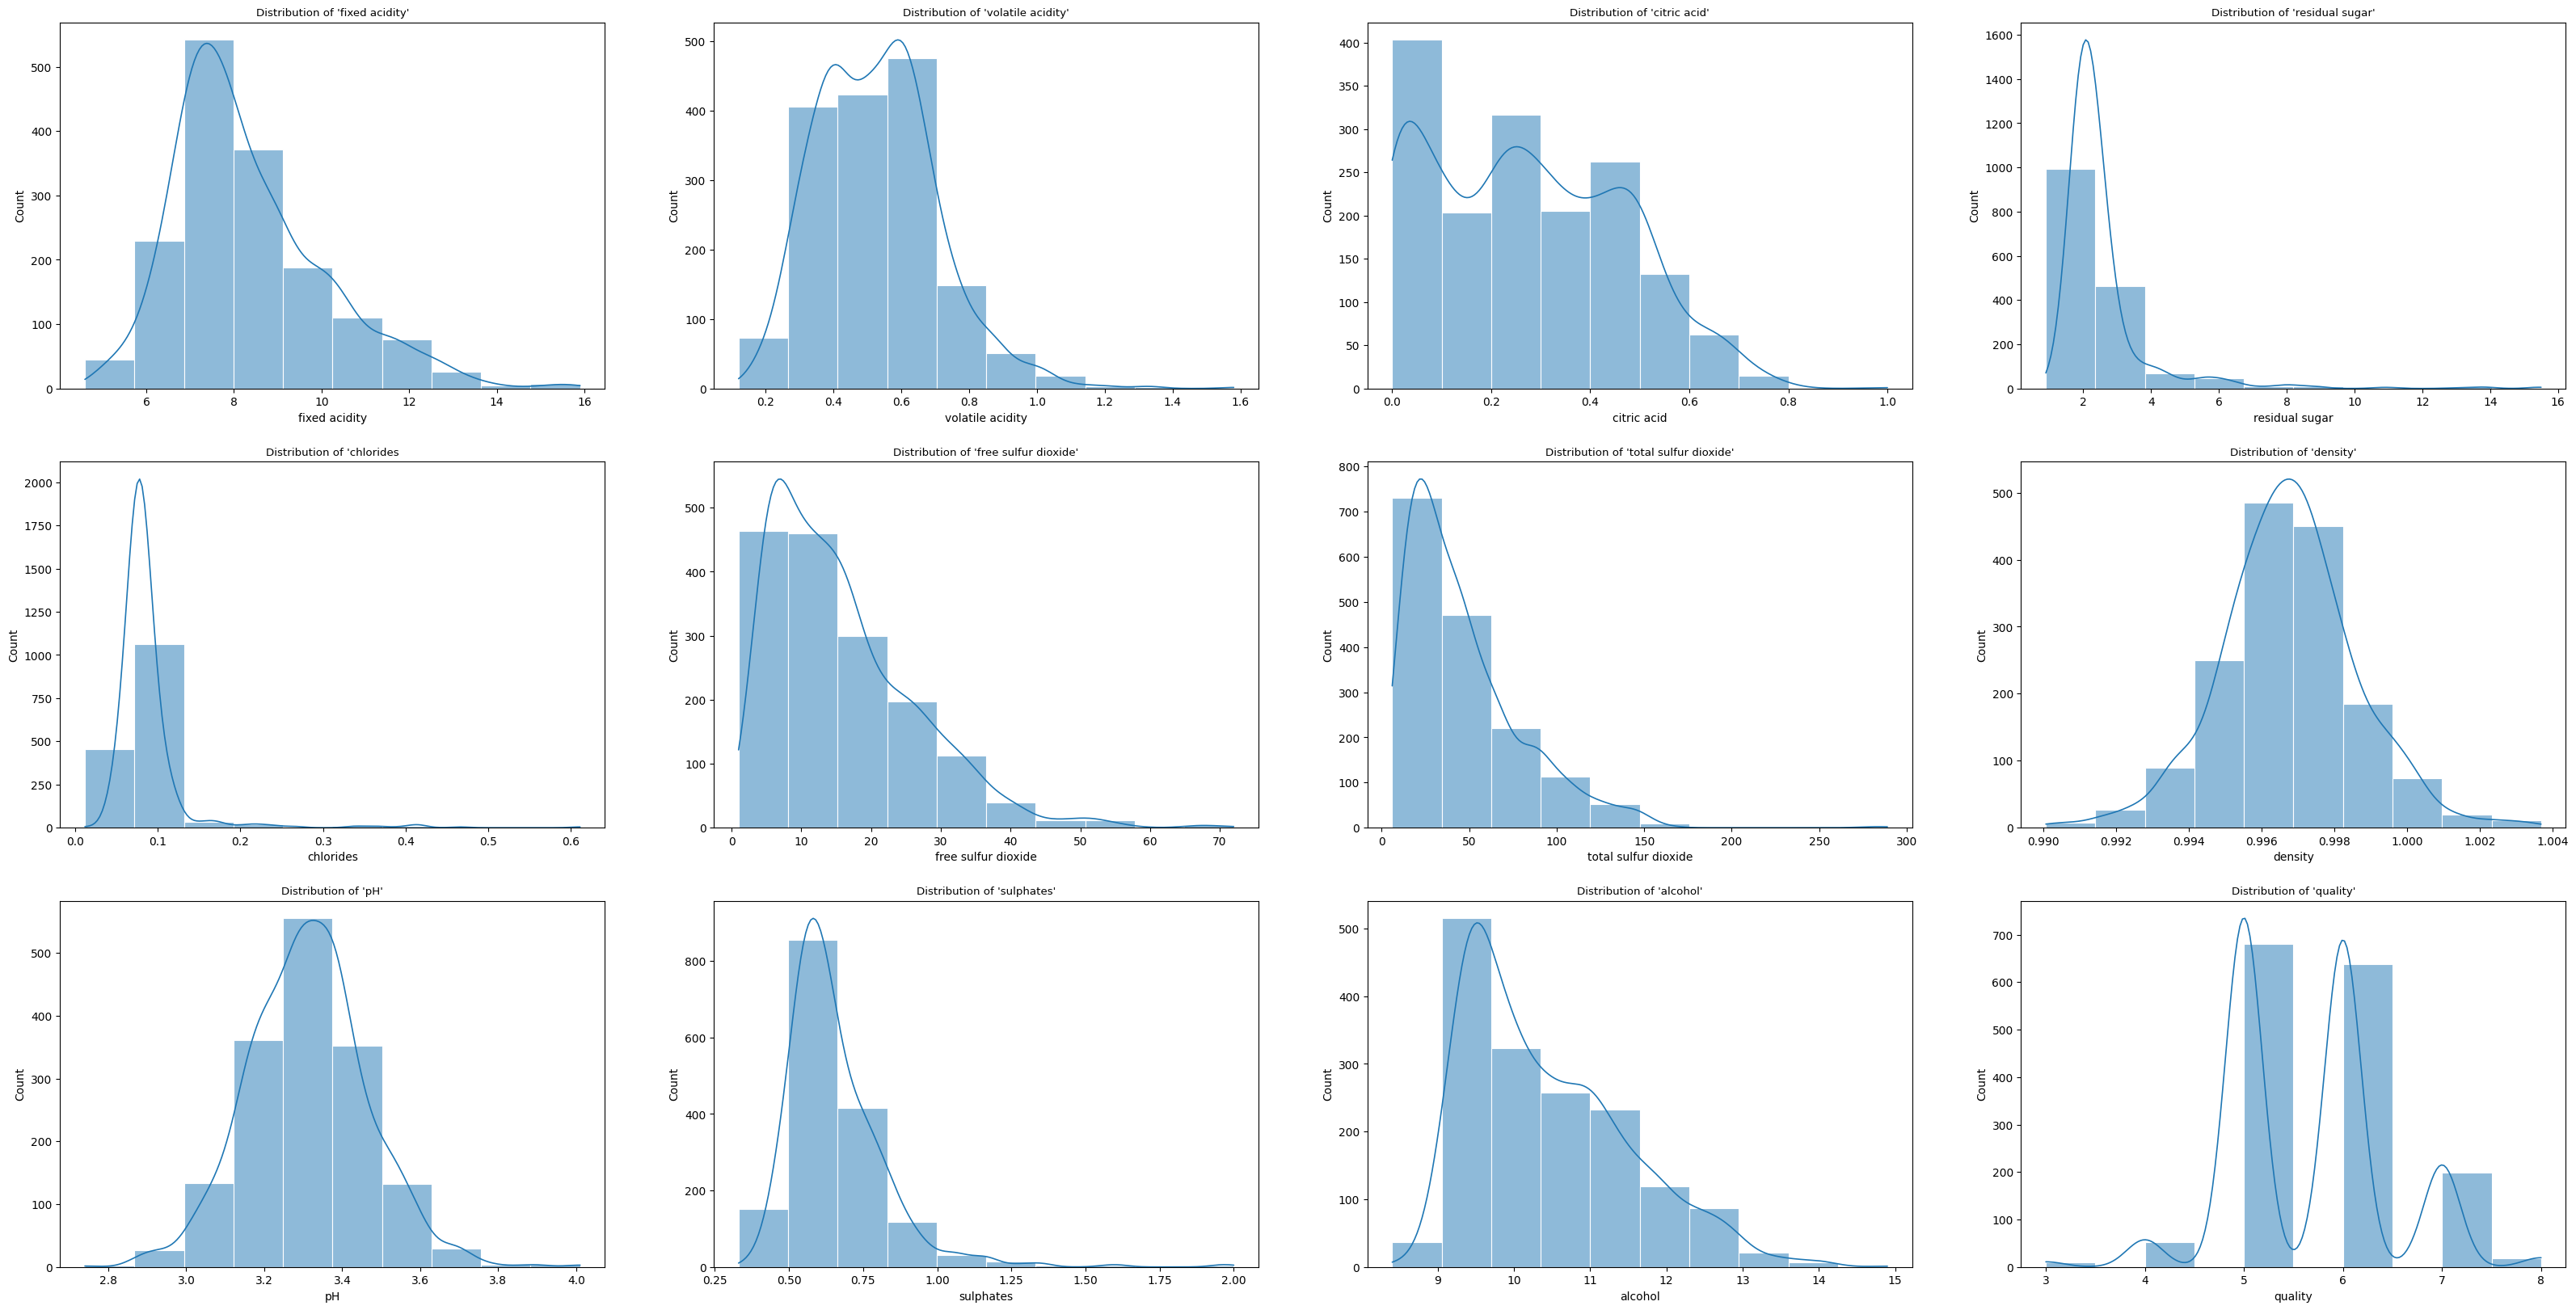

In [ ]:
# visualize
fig, axes = plt.subplots(3,4,figsize=(40,20))

sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_palette("muted")

sns.histplot(ax=axes[0,0], x=raw["fixed acidity"], bins=10, cbar=True, kde=True).set(title="Distribution of 'fixed acidity'")

sns.histplot(ax=axes[0,1], x=raw["volatile acidity"], bins=10, cbar=True, kde=True).set(title="Distribution of 'volatile acidity'")

sns.histplot(ax=axes[0,2], x=raw["citric acid"], bins=10, cbar=True, kde=True).set(title="Distribution of 'citric acid'")

sns.histplot(ax=axes[0,3], x=raw["residual sugar"], bins=10, cbar=True, kde=True).set(title="Distribution of 'residual sugar'")

sns.histplot(ax=axes[1,0], x=raw["chlorides"], bins=10, cbar=True, kde=True).set(title="Distribution of 'chlorides")

sns.histplot(ax=axes[1,1], x=raw["free sulfur dioxide"], bins=10, cbar=True, kde=True).set(title="Distribution of 'free sulfur dioxide'")

sns.histplot(ax=axes[1,2], x=raw["total sulfur dioxide"], bins=10, cbar=True, kde=True).set(title="Distribution of 'total sulfur dioxide'")

sns.histplot(ax=axes[1,3], x=raw["density"], bins=10, cbar=True, kde=True).set(title="Distribution of 'density'")

sns.histplot(ax=axes[2,0], x=raw["pH"], bins=10, cbar=True, kde=True).set(title="Distribution of 'pH'")

sns.histplot(ax=axes[2,1], x=raw["sulphates"], bins=10, cbar=True, kde=True).set(title="Distribution of 'sulphates'")

sns.histplot(ax=axes[2,2], x=raw["alcohol"], bins=10, cbar=True, kde=True).set(title="Distribution of 'alcohol'")

sns.histplot(ax=axes[2,3], x=raw["quality"], bins=10, cbar=True, kde=True).set(title="Distribution of 'quality'")

In [ ]:
raw["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
raw["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: >

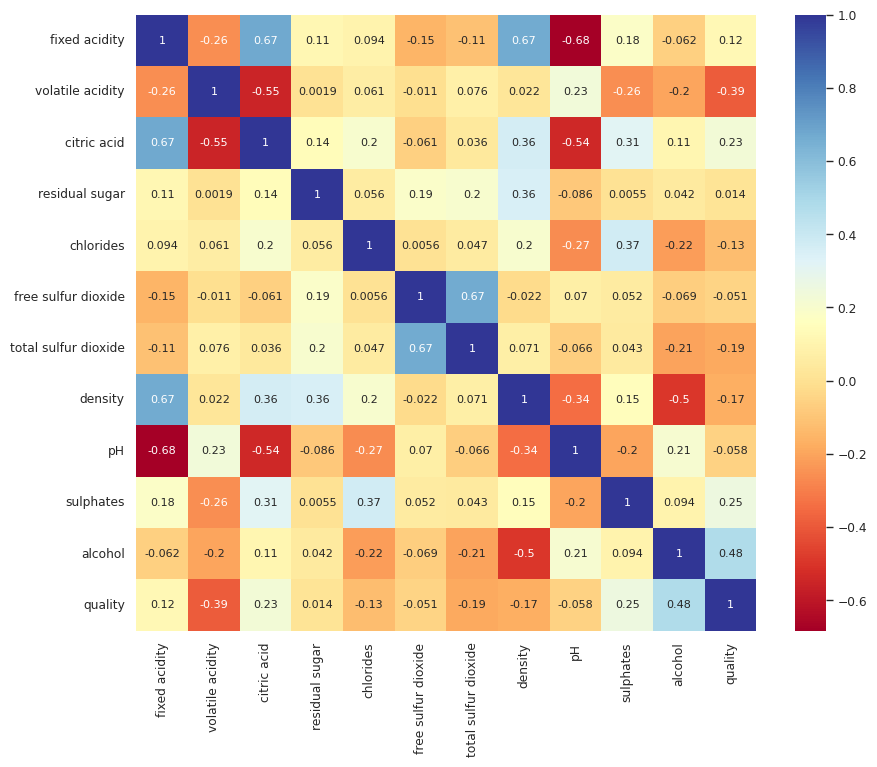

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(raw.corr(), annot=True, cmap=plt.cm.RdYlBu, annot_kws={'size':8})

# Data Pre-Processing

In [ ]:
# apply smote
smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(raw.drop(["quality"], axis=1), raw["quality"])

# Join X_resample、y_resample
df_resample = X_resample.join(y_resample)
df_resample["quality"].value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<Axes: >

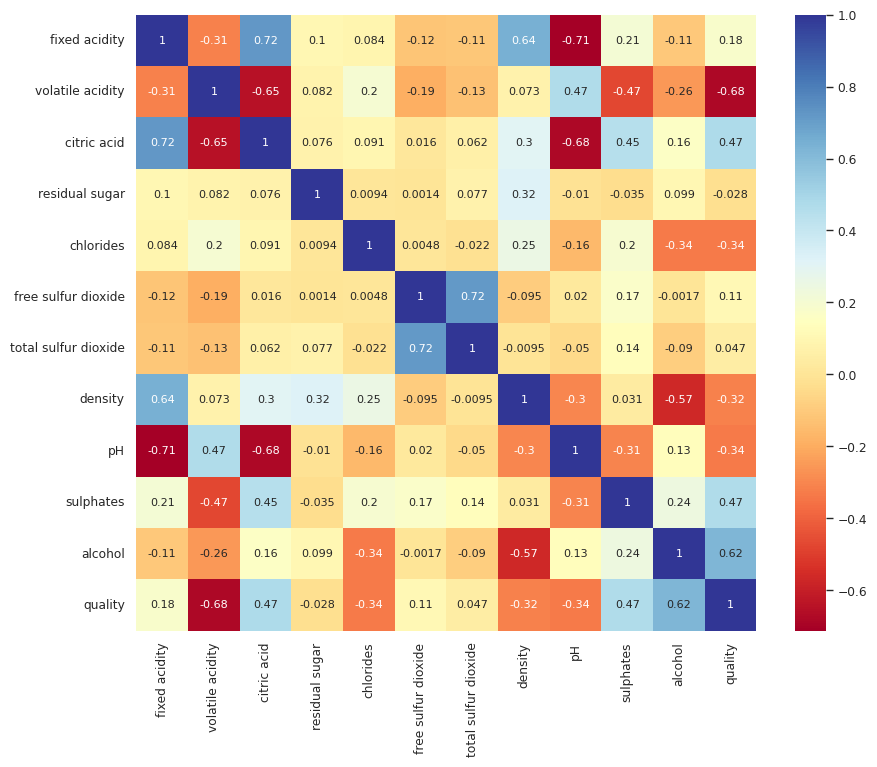

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_resample.corr(), annot=True, cmap=plt.cm.RdYlBu, annot_kws={'size':8})

從上圖顯示 total sulfur dioxide & residual sugar 和 quality 較無關聯

In [ ]:
select_column = df_resample.corr()[abs(df_resample.corr()["quality"]) > 0.1].index.tolist()
df_resample = df_resample[select_column]
df_resample.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,11.0,0.9978,3.51,0.56,9.4,5


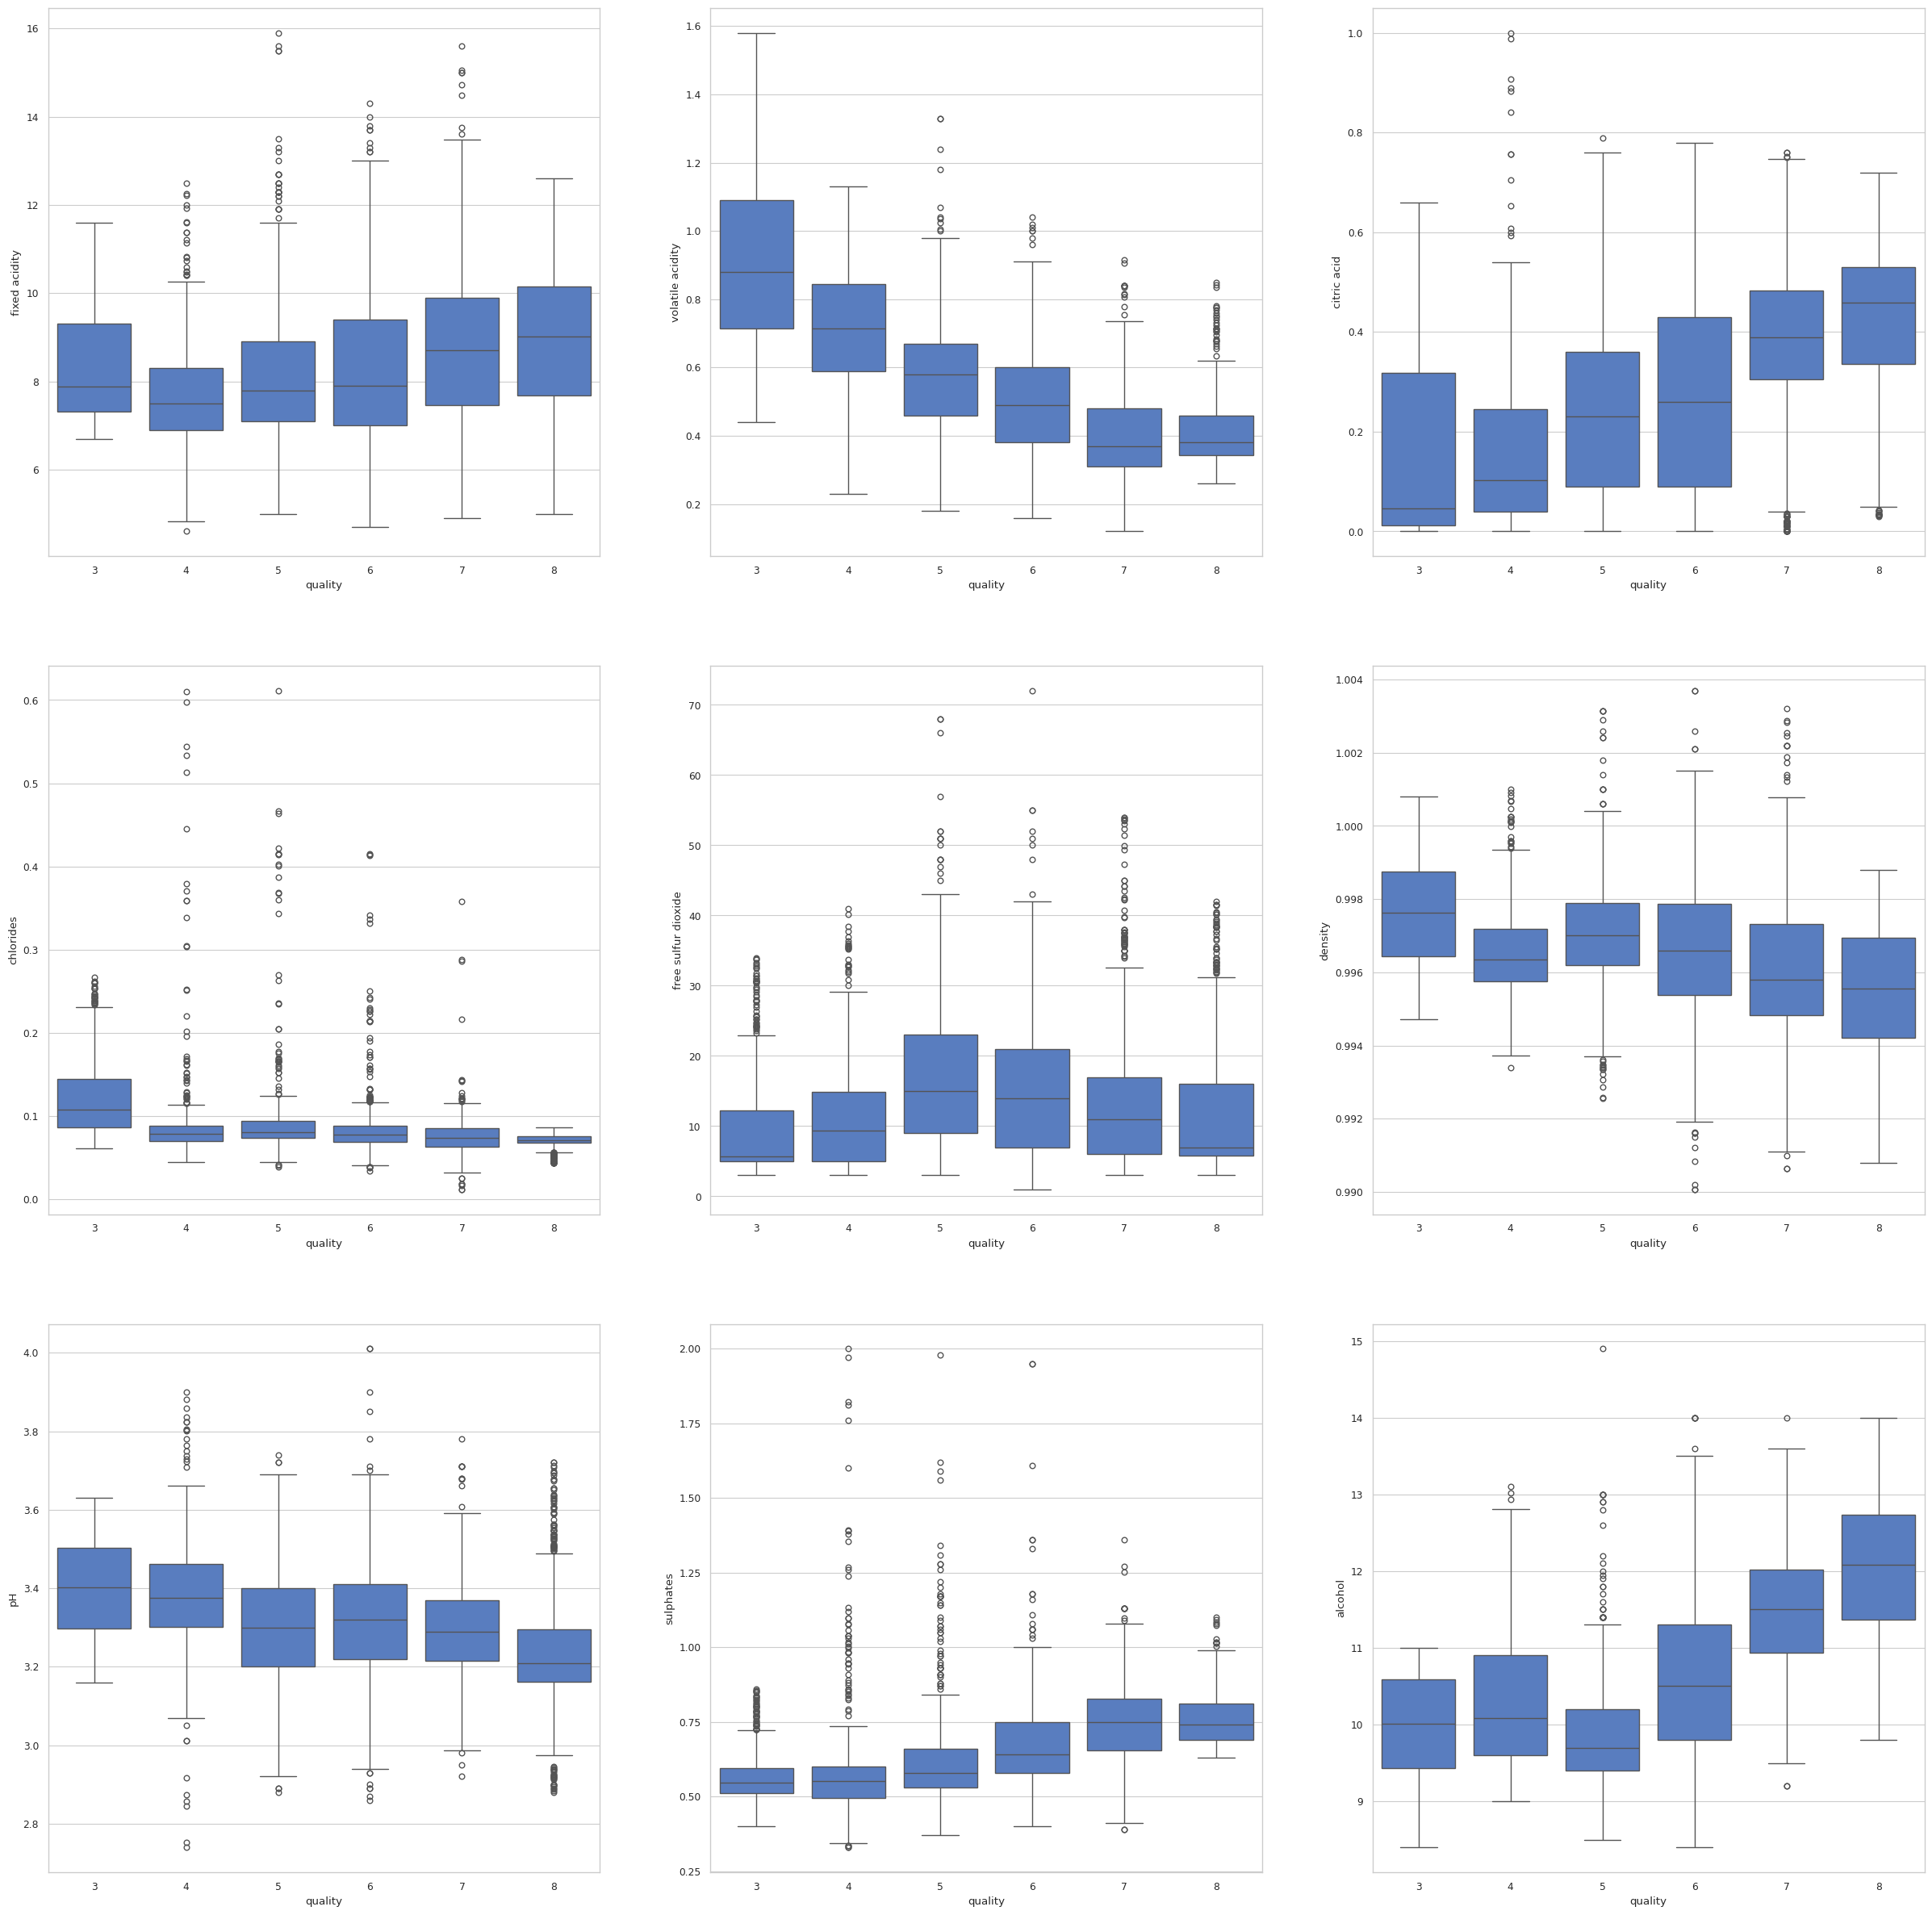

In [ ]:
# 繪製箱形圖boxplot
def box_plot(data, x, y, axe):
  sns.boxplot(ax=axe, x=x, y=y, data=data)

fig, ax = plt.subplots(3,3,figsize=(30,30))
for index, i in enumerate(select_column):
  row = index // 3
  col = index % 3
  if i != "quality":
    box_plot(df_resample, "quality", i, ax[row,col])

可以看到有許多離群值數據(outlier)，這些離群值數據會造成模式錯誤學習，故要盡量移除離群值。

IQR(四分位距)計算步驟：

1.計算第一四分位數（Q1）和第三四分位數（Q3）：Q1 是將數據集按順序排列後位於 25% 位置的值，Q3 位於 75% 位置的值。這意味著 Q1 和 Q3 之間包含了中間 50% 的數據。

2.計算四分位距（IQR）：IQR = Q3 - Q1。四分位距表示了數據的中間 50% 的分佈範圍，它提供了數據變異性的一個度量，且不受極端值的影響。

3.確定異常值的範圍：一般情況下，被認為是異常值的數據點是那些小於 Q1 - 1.5 * IQR 或大於 Q3 + 1.5 * IQR 的值。這個 1.5 的係數是約定俗成的，但根據數據的具體情況，有時也會選擇其他係數，如 3。

In [ ]:
def remove_outlier(df, columns):
  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)

  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  return df[(df[columns] <= upper_bound) & (df[columns] >= lower_bound)]

remove_outlier_column = select_column
for col in remove_outlier_column:
  df_resample = remove_outlier(df_resample, col)

df_resample = df_resample.dropna()
df_resample.reset_index(drop=True, inplace=True)
df_resample

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,0.076000,11.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,0.098000,25.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,0.092000,15.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,0.075000,17.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,0.076000,11.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...
3276,7.460685,0.358786,0.319419,0.074485,16.757260,0.994567,3.253351,0.719419,11.569918,8
3277,8.293899,0.365820,0.393055,0.059241,13.176834,0.995526,3.159099,0.772154,10.996139,8
3278,7.729226,0.478521,0.326338,0.075317,11.073933,0.992978,3.213662,0.713169,12.519368,8
3279,8.128720,0.523680,0.157238,0.067690,35.195346,0.994221,3.388279,0.723564,12.565524,8


建立新columns "good_quality"，將紅酒品質進行二分類，若quality<=5便是品質差的紅酒，若quality>5的便是品質好的紅酒。

In [ ]:
df_resample["good_quality"] = df_resample["quality"].apply(lambda x:0 if x<=5 else 1)
df_resample = df_resample.drop(["quality"], axis=1)
df_resample.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.70,0.00,0.076,11.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,0.098,25.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,0.092,15.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,0.075,17.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,0.076,11.0,0.9978,3.51,0.56,9.4,0


<Axes: xlabel='good_quality', ylabel='count'>

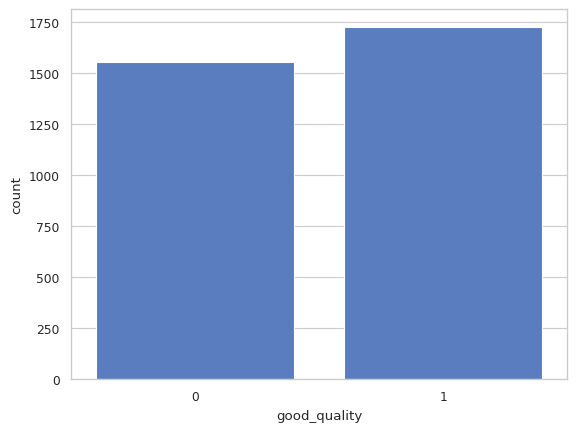

In [ ]:
sns.countplot(x="good_quality", data=df_resample)

In [ ]:
print("Good Quality Count :", df_resample["good_quality"].value_counts()[1])
print("Bad Quality Count :", df_resample["good_quality"].value_counts()[0])

Good Quality Count : 1727
Bad Quality Count : 1554


In [ ]:
shuffle_indices = np.random.permutation(df_resample.index)
df_shuffle = df_resample.reindex(shuffle_indices)
df_shuffle.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,good_quality
1675,7.184665,0.941939,0.038467,0.108518,19.077321,0.996510,3.312307,0.540773,9.723067,0
1884,8.385733,0.432566,0.362292,0.050914,3.228535,0.995735,3.291427,0.558857,11.874306,0
2371,8.064839,0.278069,0.388415,0.051614,4.000000,0.993857,3.343516,0.688415,12.452443,1
1016,7.100000,0.750000,0.010000,0.059000,11.000000,0.992420,3.390000,0.400000,12.800000,1
768,7.600000,0.430000,0.400000,0.082000,6.000000,0.995380,3.440000,0.540000,12.200000,1


對資料進行Z-score縮放

In [ ]:
X = df_shuffle.drop(["good_quality"], axis=1)
y = df_shuffle["good_quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# return numpy.ndarray data type
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

feature_col = X.columns.tolist()
X_train = pd.DataFrame(data=X_train, columns=feature_col)
X_test = pd.DataFrame(data=X_test, columns=feature_col)
X_val = pd.DataFrame(data=X_val, columns=feature_col)

It's ready for training model

# Model training

model package

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, learning_curve, validation_curve
from xgboost.sklearn import XGBClassifier

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## Bagging Ensemble -> RandomForestClassifier

In [ ]:
rfc_dict = {
    "n_estimators":[50,100,150,200],
    "max_depth":[5,10,15,20]
}

rfc = RandomForestClassifier(random_state=42)
rfc_grid = GridSearchCV(rfc, param_grid=rfc_dict, cv=3, n_jobs=-1)
result = rfc_grid.fit(X_train, y_train)
print("RandomForestClassifier Best params：", result.best_params_)

rfc = result.best_estimator_
rfc_cross_val_score = cross_val_score(rfc, X_train, y_train, scoring="accuracy", cv=10)
rfc_cross_val_score

RandomForestClassifier Best params： {'max_depth': 20, 'n_estimators': 150}


array([0.93043478, 0.88695652, 0.9       , 0.91304348, 0.93478261,
       0.91304348, 0.92139738, 0.89082969, 0.92576419, 0.92576419])

In [ ]:
# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(X_train, y_train)
# rfc.score(X_test, y_test)

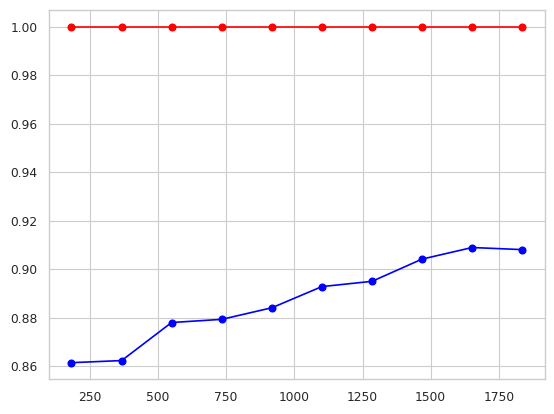

In [ ]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=5,
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color='b', label="Cross Valid score")

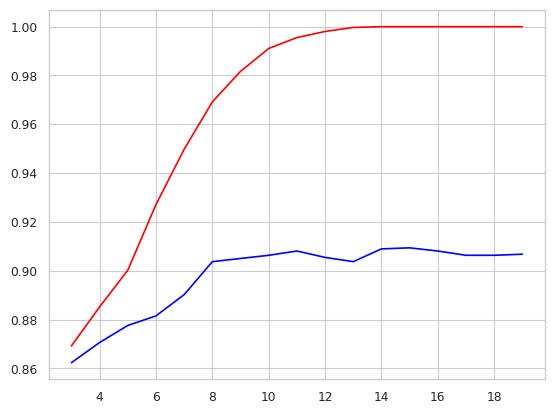

In [ ]:
# Validation curve
param_range = range(3,20)

train_scores, test_scores = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

param_range = range(3,20)

plt.plot(param_range, train_scores_mean, label="Training scores", color='r')
plt.plot(param_range, test_scores_mean, label="Cross Valid scores", color='b')

學習曲線可看出模型並overfitting跡象，驗證曲線(max_depth)可看出最大深度位於10-12之間可以避免overfitting，並且達到最好的準確度，也避免欠擬合狀況。

## Boosting Ensemble -> XGBoostClassifier

In [ ]:
# xgboost
xbg = XGBClassifier()

# 設定測試集分割
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

xgb_dict={
    "n_estimators":[500,1000],
    "max_depth":[5,8,10],
    "learning_rate":[0.1],
    "objective":["binary:logistic"],
    "alpha":[0], # L1 正則化參數 (Lasso) 產生稀疏矩陣
    "lambda":[1,2,3], # L2 正則化參數 (Ridge) 產生非稀疏矩陣，僅調整權重近乎於0
    "gamma":[0],
}

xgb_grid = GridSearchCV(estimator=xbg, param_grid=xgb_dict, scoring="accuracy", n_jobs=-1, cv=5)

# 設定參數提前停止
fit_params = {
    "early_stopping_rounds": 50, # 若迭代50倫沒有減少logloss便停止
    "eval_set": [(X_val, y_val)],  # 測試集切割
    "eval_metric": 'logloss',
    "verbose": True
}

# 使用带有提前停止的 fit 方法
result = xgb_grid.fit(X_train, y_train, **fit_params)

# 由於GridSearchCV使用提前停止訓練的 "early_stopping_rounds" 並不支持繪製learning curve，故要重新訓練一次模型
best_params = result.best_params_
print("XGBClassifier Best Parameter：", best_params)

xgb = XGBClassifier(**best_params, eval_metric='logloss')
xgb_cross_val_score = cross_val_score(xgb, X_train, y_train, cv=10, n_jobs=-1)
xgb_cross_val_score

[0]	validation_0-logloss:0.62745
[1]	validation_0-logloss:0.57184
[2]	validation_0-logloss:0.52477
[3]	validation_0-logloss:0.48404


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.45095
[5]	validation_0-logloss:0.42033
[6]	validation_0-logloss:0.39584
[7]	validation_0-logloss:0.37409
[8]	validation_0-logloss:0.35446
[9]	validation_0-logloss:0.33777
[10]	validation_0-logloss:0.32372
[11]	validation_0-logloss:0.31043
[12]	validation_0-logloss:0.29860
[13]	validation_0-logloss:0.28787
[14]	validation_0-logloss:0.27790
[15]	validation_0-logloss:0.27038
[16]	validation_0-logloss:0.26204
[17]	validation_0-logloss:0.25478
[18]	validation_0-logloss:0.24898
[19]	validation_0-logloss:0.24458
[20]	validation_0-logloss:0.23930
[21]	validation_0-logloss:0.23470
[22]	validation_0-logloss:0.23029
[23]	validation_0-logloss:0.22500
[24]	validation_0-logloss:0.22161
[25]	validation_0-logloss:0.21864
[26]	validation_0-logloss:0.21548
[27]	validation_0-logloss:0.21301
[28]	validation_0-logloss:0.21025
[29]	validation_0-logloss:0.20865
[30]	validation_0-logloss:0.20617
[31]	validation_0-logloss:0.20521
[32]	validation_0-logloss:0.20390
[33]	validation_0-lo

array([0.92608696, 0.91304348, 0.89565217, 0.90869565, 0.90869565,
       0.8826087 , 0.930131  , 0.90829694, 0.91266376, 0.92139738])

[0]	validation_0-logloss:0.61977	validation_1-logloss:0.62745
[1]	validation_0-logloss:0.56116	validation_1-logloss:0.57184
[2]	validation_0-logloss:0.51127	validation_1-logloss:0.52477
[3]	validation_0-logloss:0.46882	validation_1-logloss:0.48404
[4]	validation_0-logloss:0.43234	validation_1-logloss:0.45095
[5]	validation_0-logloss:0.40040	validation_1-logloss:0.42033
[6]	validation_0-logloss:0.37185	validation_1-logloss:0.39584
[7]	validation_0-logloss:0.34645	validation_1-logloss:0.37409
[8]	validation_0-logloss:0.32317	validation_1-logloss:0.35446
[9]	validation_0-logloss:0.30287	validation_1-logloss:0.33777
[10]	validation_0-logloss:0.28438	validation_1-logloss:0.32372
[11]	validation_0-logloss:0.26687	validation_1-logloss:0.31043
[12]	validation_0-logloss:0.25098	validation_1-logloss:0.29860
[13]	validation_0-logloss:0.23641	validation_1-logloss:0.28787
[14]	validation_0-logloss:0.22332	validation_1-logloss:0.27790
[15]	validation_0-logloss:0.21066	validation_1-logloss:0.27038
[1

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.18059	validation_1-logloss:0.24898
[19]	validation_0-logloss:0.17213	validation_1-logloss:0.24458
[20]	validation_0-logloss:0.16488	validation_1-logloss:0.23930
[21]	validation_0-logloss:0.15810	validation_1-logloss:0.23470
[22]	validation_0-logloss:0.15223	validation_1-logloss:0.23029
[23]	validation_0-logloss:0.14645	validation_1-logloss:0.22500
[24]	validation_0-logloss:0.14147	validation_1-logloss:0.22161
[25]	validation_0-logloss:0.13673	validation_1-logloss:0.21864
[26]	validation_0-logloss:0.13208	validation_1-logloss:0.21548
[27]	validation_0-logloss:0.12760	validation_1-logloss:0.21301
[28]	validation_0-logloss:0.12373	validation_1-logloss:0.21025
[29]	validation_0-logloss:0.12028	validation_1-logloss:0.20865
[30]	validation_0-logloss:0.11590	validation_1-logloss:0.20617
[31]	validation_0-logloss:0.11355	validation_1-logloss:0.20521
[32]	validation_0-logloss:0.11066	validation_1-logloss:0.20390
[33]	validation_0-logloss:0.10802	validation_1-logloss:

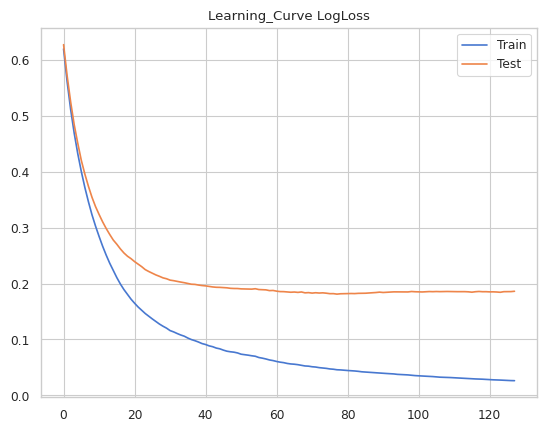

In [ ]:
# Learning Curve
eval_set = [(X_train, y_train), (X_val, y_val)]
xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=eval_set, verbose=True)

# 獲取訓練中結果
result = xgb.evals_result()

epoch = len(result["validation_0"]["logloss"])
x_axis = range(0, epoch)

fig, ax = plt.subplots()
ax.plot(x_axis, result["validation_0"]["logloss"], label="Train")
ax.plot(x_axis, result["validation_1"]["logloss"], label="Test")
plt.title("Learning_Curve LogLoss")
plt.legend()

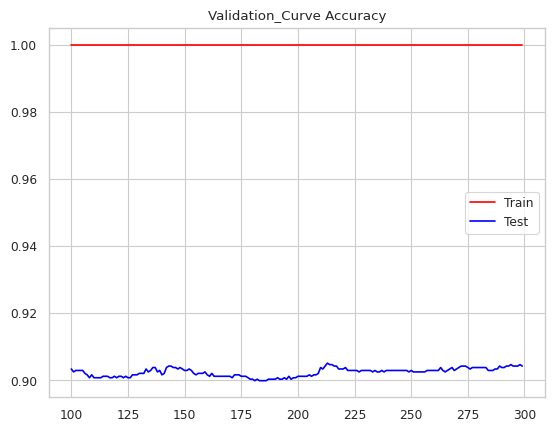

In [ ]:
# validation curve
# 針對n_estimator、max_depth
param_range = range(100, 300)

train_scores, test_scores = validation_curve(
    estimator=xgb,
    X=X_train,
    y=y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, label="Train", color='r')
plt.plot(param_range, test_scores_mean, label="Test", color='b')
plt.title("Validation_Curve Accuracy")
plt.legend()

## Deep Learning -> MLP(Multi-Layer Perceptron)(多層感知機)

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    # Layer
    self.layer1 = nn.Linear(9, 64)
    self.layer2 = nn.Linear(64, 32)
    self.layer3 = nn.Linear(32, 16)
    self.output = nn.Linear(16, 1)
    # Activation Function
    self.relu = nn.ReLU()

    # dropout layer
    self.dropout = nn.Dropout(0.5)

    # output Layer Activation Functional
    self.sigmod = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.layer1(x))
    x = self.dropout(x)
    x = self.relu(self.layer2(x))
    x = self.relu(self.layer3(x))
    x = self.sigmod(self.output(x))
    return x


model = BinaryClassifier()
# BCELoss use for Binary Classifier
criterion = nn.BCELoss()
# Adam optimizer and set learning rate 0.001
# 引入正则化项（如 L1、L2 正则化）到模型中可以减少过拟合。在 PyTorch 中，你可以在优化器中设置 weight_decay 参数来应用 L2 正则化。
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 查看GPU是否可用
if torch.cuda.is_available():
  print("GPU is available")
  model.cuda()
else:
  print("GPU is not available")



# transform training data to "tensor"
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# combine to dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# batch
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=True)

# storage accuracy
train_accuracy_list = []
test_accuracy_list = []

for epoch in range(301):
  model.train()
  total_correct = 0
  total_num = 0
  total_loss = 0

  for batch_index, (data, label) in enumerate(train_loader):
    # 清零梯度
    optimizer.zero_grad()

    # forward
    output = model(data)
    loss = criterion(output, label)
    total_loss += loss

    # backward and optimizer
    loss.backward()
    optimizer.step()

    # 準確率、Loss
    predict = torch.round(output)
    correct = (predict == label).sum().item()
    total_correct += correct

    # label 裡元素數量
    total = label.size(0)
    total_num += total


  loss = total_loss / total_num
  accuracy = total_correct / total_num
  train_accuracy_list.append(accuracy)
  print(f'Train Case ： Epoch {epoch}, Average_Loss:', loss)
  print("Train Case Average_Accuracy：", accuracy)

  # testset
  model.eval()
  test_total_correct = 0
  test_total_num = 0
  test_total_loss = 0
  for batch_index, (data, label) in enumerate(test_loader):
    output = model(data)
    loss = criterion(output, label)
    test_total_loss += loss

    predict = torch.round(output)
    correct = (predict == label).sum().item()
    test_total_correct += correct

    total = label.size(0)
    test_total_num += total


  accuracy = test_total_correct / test_total_num
  loss = test_total_loss / test_total_num
  test_accuracy_list.append(accuracy)
  print(f'Test Case ： Epoch {epoch}, Loss: ', loss)
  print("Test Case Accuracy：", accuracy)
  optimizer.zero_grad()


GPU is not available
Train Case ： Epoch 0, Average_Loss: tensor(0.0083, grad_fn=<DivBackward0>)
Train Case Average_Accuracy： 0.8323170731707317
Test Case ： Epoch 0, Loss:  tensor(0.0066, grad_fn=<DivBackward0>)
Test Case Accuracy： 0.8498985801217038
Train Case ： Epoch 1, Average_Loss: tensor(0.0064, grad_fn=<DivBackward0>)
Train Case Average_Accuracy： 0.8619337979094077
Test Case ： Epoch 1, Loss:  tensor(0.0064, grad_fn=<DivBackward0>)
Test Case Accuracy： 0.8559837728194726
Train Case ： Epoch 2, Average_Loss: tensor(0.0061, grad_fn=<DivBackward0>)
Train Case Average_Accuracy： 0.8697735191637631
Test Case ： Epoch 2, Loss:  tensor(0.0062, grad_fn=<DivBackward0>)
Test Case Accuracy： 0.8681541582150102
Train Case ： Epoch 3, Average_Loss: tensor(0.0062, grad_fn=<DivBackward0>)
Train Case Average_Accuracy： 0.8667247386759582
Test Case ： Epoch 3, Loss:  tensor(0.0061, grad_fn=<DivBackward0>)
Test Case Accuracy： 0.8701825557809331
Train Case ： Epoch 4, Average_Loss: tensor(0.0060, grad_fn=<Div

In [ ]:
len(train_accuracy_list)

301

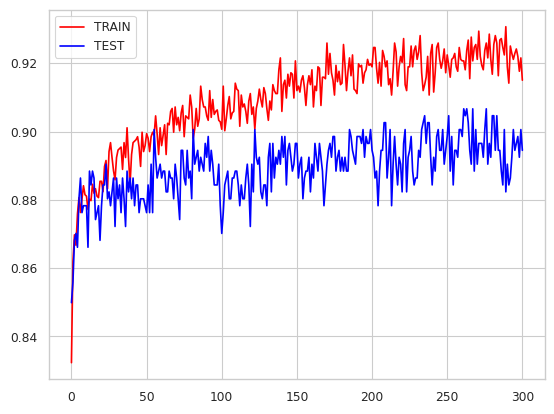

In [ ]:
# Learning Curve
dataSize = range(301)
plt.plot(dataSize, train_accuracy_list, color="r", label="TRAIN")
plt.plot(dataSize, test_accuracy_list, color="b", label="TEST")
plt.legend()

# Model Explanation

## Explainable AI -> SHAP

In [ ]:
# Explainable AI -> SHAP
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.6 MB/s eta 0:00:00


XGB AI explaination

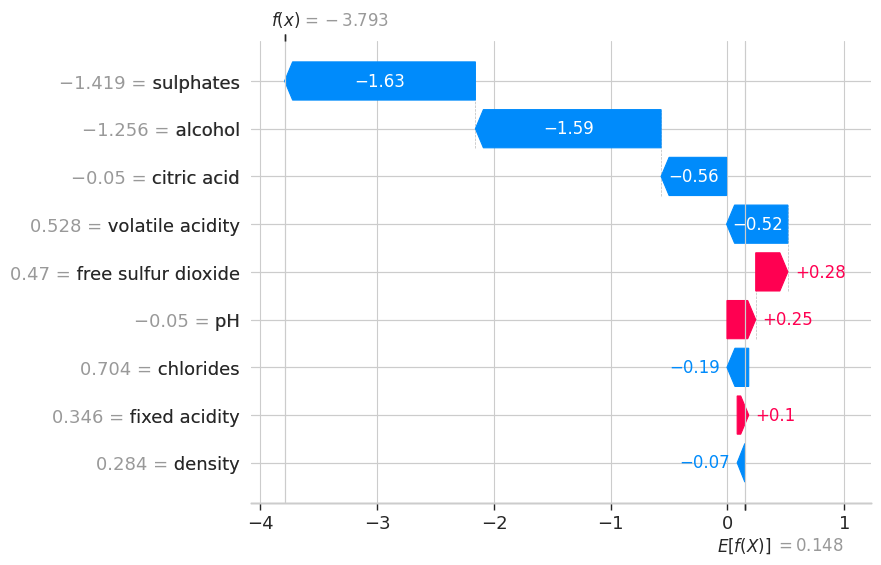

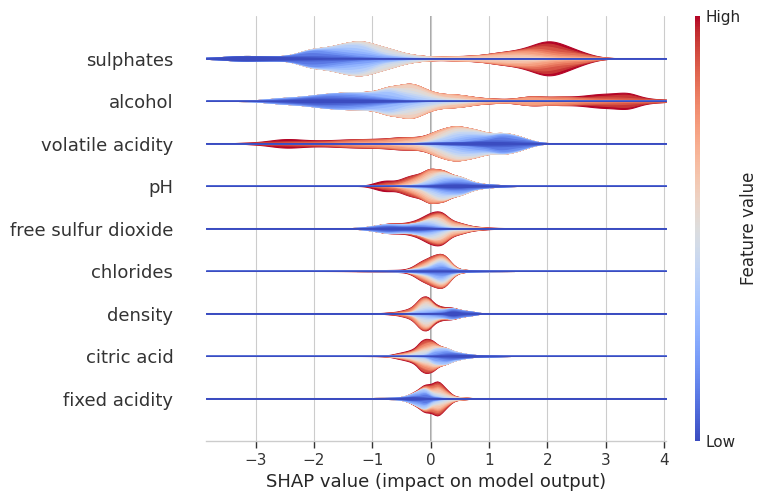

.values =
array([ 0.09880902, -0.52484095, -0.5610554 , -0.18634269,  0.27533552,
       -0.0650003 ,  0.24631645, -1.6340586 , -1.5905446 ], dtype=float32)

.base_values =
0.14827645

.data =
array([ 0.34565342,  0.52820087, -0.04971116,  0.70436566,  0.47022249,
        0.28368615, -0.0499548 , -1.4191575 , -1.25558856])

In [ ]:
import shap

# create shap explainer
xgb_explainer = shap.TreeExplainer(xgb)
# values、base_value、data
# values -> 模型對於預測結果的貢獻值
# base_value -> 基線值，沒有特徵影響之下，模型的預期輸出
# data -> 原始輸入特徵數據
shap_values = xgb_explainer(X_test)

shap.initjs()

shap_values[0]
sample_index=0

shap.plots.waterfall(shap_values[0])
shap.summary_plot(shap_values, X_test, plot_type="layered_violin")

# shap.force_plot(xgb_explanier.expected_value, shap_values.values, X_test, plot_cmp="DrDb")
shap.force_plot(shap_values, X_test, plot_cmap="DrDb")

# check shape_values data
shap_values[0]

利用SHAP(SHapley values Additive exPlanation)進行AI explaination 觀察各個feature對於模型的影響程度。

呈現圖形有以下重點：

1. waterfall

2. summary_plot

3. force_plot



參考網址

https://ithelp.ithome.com.tw/articles/10276922
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/waterfall.html


In [ ]:
# RFC SHAP
rfc_explainer = shap.TreeExplainer(rfc, model_output="raw")
shap_values = rfc_explainer.shap_values(X_train)




In [ ]:
X_train.iloc[0,:]

fixed acidity         -0.377541
volatile acidity       0.054475
citric acid           -1.305498
chlorides              0.201973
free sulfur dioxide   -0.210749
density               -0.179253
pH                     0.084305
sulphates             -0.656029
alcohol               -0.669376
Name: 0, dtype: float64

In [ ]:
# DLL shap
# X_shap = X_train_tensor[100:]



# batch = next(iter(test_loader))
# data, _ = batch
# background = data[:30]
# test = data[30:]


print(background.shape)
print(test.shape)

DL_explainer = shap.DeepExplainer(model, X_train_tensor)
shap_values = DL_explainer(X_test_tensor)
# shap.summary_plot(shap_values)

NameError: name 'background' is not defined